# Read in data
#### (I removed the two topcode variables as they are metadata, not data)

In [108]:
import pandas as pd
from sklearn import tree
import graphviz

load = pd.read_excel('atus/ehresp_2014.xlsx')
column_names = ['eeincome1', 'erhhch', 'erincome', 'erspemch', 'ertpreat', 'ertseat', 'eudietsoda', 'eudrink', 'eueat', 'euexercise', 'euexfreq', 'eufastfd', 'eufastfdfrq', 'euffyday', 'eufdsit', 'eufinlwgt', 'eusnap', 'eugroshp', 'euhgt', 'euinclvl', 'euincome2', 'eumeat', 'eumilk', 'euprpmel', 'eusoda', 'eustores', 'eustreason', 'eutherm', 'euwgt', 'euwic', 'exincome1', 'eugenhth', 'erbmi']
target_column_name = 'erbmi'
dataset = load[column_names]
print(dataset.shape)


(11212, 33)


# Replace all nonvalid value codes with 0

In [111]:
df = dataset.applymap(lambda x: max(x,0))
df.shape

(11212, 33)

# Remove all rows where the BMI data is missing.

In [112]:
empty_rows = list()
for i in range(df.shape[0]):
    if df.iloc[i]['erbmi'] == 0:
        empty_rows.append(i)
df.drop(index=empty_rows, inplace=True)
df.shape

(10637, 33)

# Train a Decision Tree Regressor using 'erbmi' as the target

In [113]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
regressor = tree.DecisionTreeRegressor(max_depth=3)
regressor.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

# Display a graph showing the nodes of the decision tree

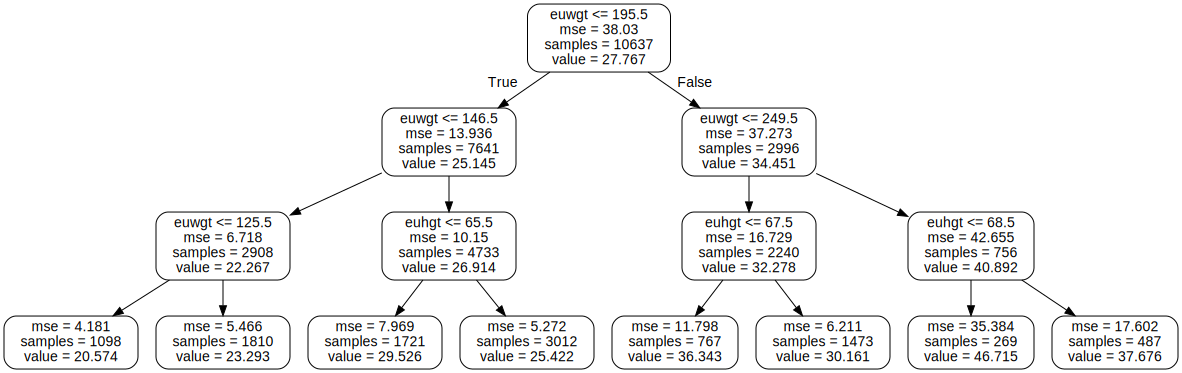

In [114]:
dot_data = tree.export_graphviz(regressor,feature_names=X.columns,rounded=True)
graph = graphviz.Source(dot_data)
#graph.render("BMI")
graph

# We can see that weight and height are the top two explanatory variables. However, that gains us nothing since BMI is a function of weight and height. We want to look for behaviorial and socio-economic factors related to health. So redo without height and weight

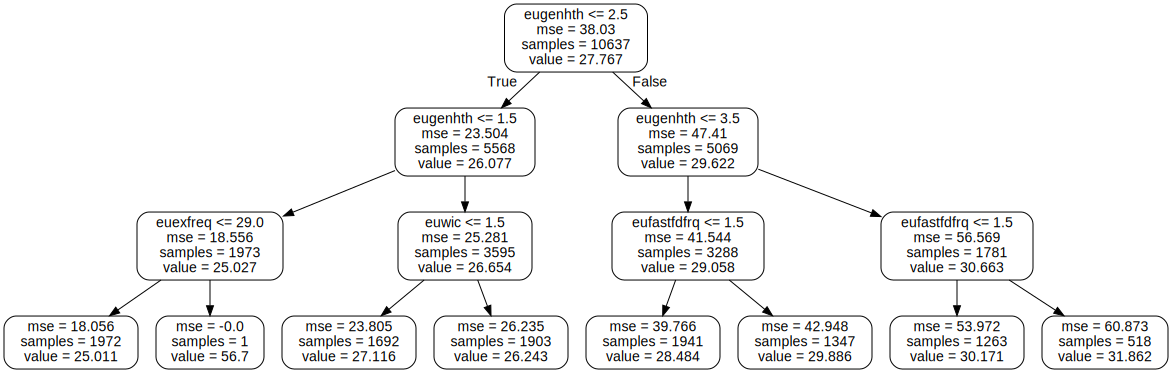

In [117]:
if 'euwgt' in X.columns:
    X = X.drop(columns=['euwgt'])
if 'eught' in X.columns:
    X = X.drop(columns=['eught'],inplace=True)
regressor.fit(X,y)
dot_data = tree.export_graphviz(regressor,feature_names=X.columns,rounded=True)
graph = graphviz.Source(dot_data)
graph

# Now general health is the strongest explanatory value. No surprise that General Health is associated with BMI. To strengthen the output, I want to change the labels in 'eugenhth' from integers to strings, and recode 'erbmi' as a categorical variable so we can predict unhealthy bmi values instead of the BMI value.

(Also I to prepare eugenhth for use as a target)